<a href="https://colab.research.google.com/github/Leilisson/Data_Science/blob/master/Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Airbnb: A brief data analysis from Quebec - Canadá

According its website, the [Airbnb](https://www.airbnb.com/) is one of the world’s largest marketplaces offering over 7 million accommodations and 50,000 handcrafted activities, all powered by local hosts. With more than three quarters of a billion guest arrivals to date, and accessible in 62 languages across 220+ countries and regions, Airbnb promotes people-to-people connection, community and trust around the world.

The Airbnb provide data from its website for some of the major cities around the world.Through the website  [Inside Airbnb](http://insideairbnb.com/get-the-data.html), it's possible to download a large quantity of data to develop projects and *Data Science* solutions. 

<center><img alt="Analysing Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we go to analyze data from Quebec in Canada and see witch insights can be extracted from raw data.**

## Data Collect 


In [0]:
# import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [0]:
# importing file listings.csv into a DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/qc/quebec-city/2020-05-10/visualisations/listings.csv')


## Data Analysis


**Variables Dictionary**

* `id` - Generated number to identify each property
* `name` - Property name
* `host_id` - Number to identify property's host
* `host_name` - Host's name
* `neighbourhood_group` - This collumn doens't have any valid value
* `neighbourhood` - Neighbourhood's name. 
* `latitude` - Latitude coordinates
* `longitude` - Longitude coordinates
* `room_type` - Room type annouced
* `price` - Price to rent the property
* `minimum_nights` - Minimum nights to rent 
* `number_of_reviews` - Number of properties reviews
* `last_review` - Last property reviews
* `reviews_per_month` - Number of reviews per month 
* `calculated_host_listings_count` - Number of properties per host
* `availability_365` - Availability in one year

Before to start any analysis, let's see the first 5 entries for our *dataset*.


In [6]:
# showing first five entries 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,54334,Beau logement avec vue magnifique sur les mont...,254811,Charlotte,NaN,Quartier 5-1,46.91400,-71.19565,Entire home/apt,100,3,89,2020-02-28,0.83,1,336
1,138381,Bed & Breakfast La California,675584,Mary,NaN,Sillery,46.76843,-71.26636,Private room,145,1,153,2019-12-15,1.41,2,343
2,198548,Fabulous view in heart of Québec,960772,Marianne,NaN,Saint-Roch,46.81233,-71.22545,Entire home/apt,150,15,47,2020-04-18,0.45,1,270
3,214967,Au bord du fleuve/Beach house,1110010,Julie,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.80286,-71.21271,Private room,85,4,160,2020-02-16,1.70,1,260
4,268812,Apartment Old city Quebec condo,1408583,Émilie,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.81023,-71.21082,Entire home/apt,40,30,77,2019-02-07,0.75,1,184


### **Q1. How many attributes and how many entries does our dataset have? What are variables type?**

In [7]:
# identify data volume from DataFrame
print("Entries:\t {}".format(df.shape[0]))
print("Variables:\t {}\n".format(df.shape[1]))

# verify the firts five entries from dataset
display(df.dtypes)

Entries:	 2667
Variables:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. What is the percentage of missing values?**


<p style="text-align:justify">The quality of a *dataset* is direct related to quantity of missing values. It's important understand whether this missing values are significant compared to total entries. </p>

* We can notice that collumn `neighbourhood_group` has 100% missing values. 
* The variables `reviews_per_month` and `last_review` have missing values around 15%.

In [8]:
# Shorting in desceding order the variables by missing values. 
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.151106
last_review                       0.151106
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. What is the distribution type of variables?** 

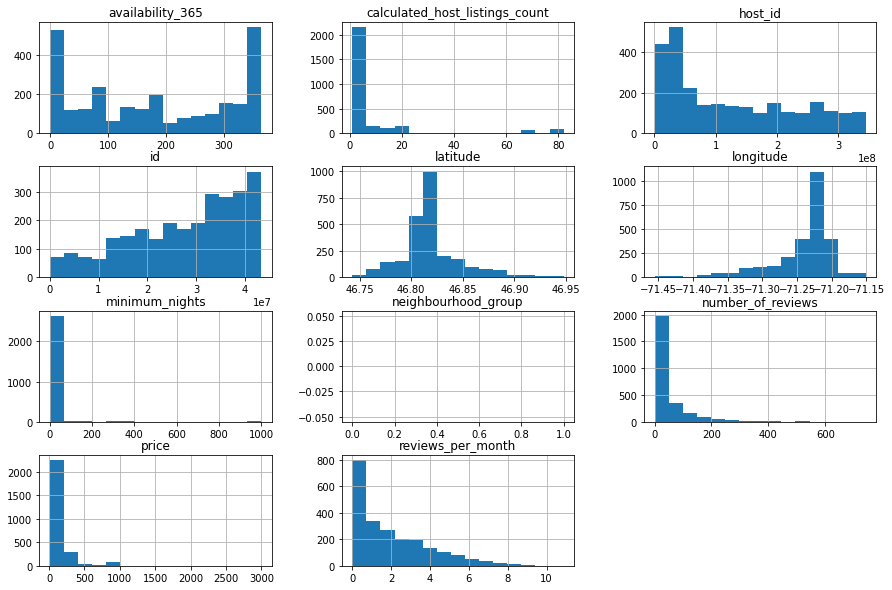

In [9]:
# plot histograms of numerical variables
df.hist(bins=15, figsize=(15,10));

### **Q4. Are there Outliers present?**

From the histogram, it's possible to verify the signs of the presence of the outliers. 

This values distort our analysis and graphical representation. To confirm, there are two quick ways that help us to detect the outliers:
* Statistical summary using `describe()` method
* Plot `boxplot` for variables

In [10]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2667.000000,2667.000000,2667.000000,2264.000000,2667.000000,2667.000000
mean,151.246719,10.220847,40.481815,2.068154,7.600675,179.536558
std,198.926177,43.914732,63.620793,1.967559,17.205040,134.346398
min,14.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,1.000000,2.000000,0.450000,1.000000,52.000000
50%,95.000000,2.000000,14.000000,1.440000,2.000000,173.000000
75%,155.000000,3.000000,52.000000,3.270000,4.000000,322.000000
max,3000.000000,1000.000000,743.000000,10.880000,82.000000,365.000000


#### Boxplot for minimun_nights

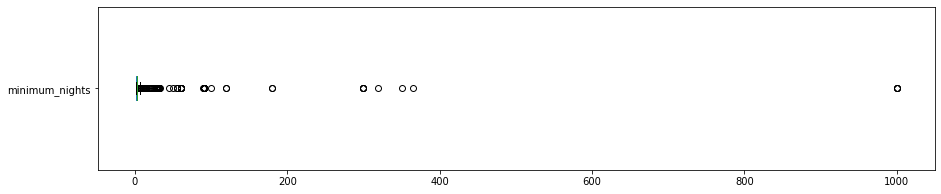

minimum_nights: values over 30:
340 entries
12.7484%


In [11]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# show the quantity of values over 30 days for minimum_nights
print("minimum_nights: values over 30:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot for price


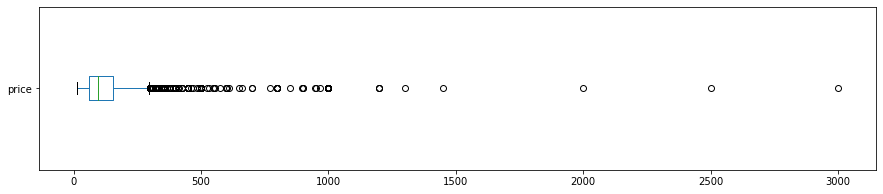

price: values over 500: 
106 entries
3.9745%


In [12]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#Quantity of values over 500 for price 
print("price: values over 500: ")
print("{} entries".format(len(df[df.price>500])))
print("{:.4f}%".format((len(df[df.price > 500])/df.shape[0])*100))

#### Histogram without *outliers*

We indentify outliers at `price` and `minimum_nights` variables. Now  let's clean up our *dataset* and plot histogram again.  

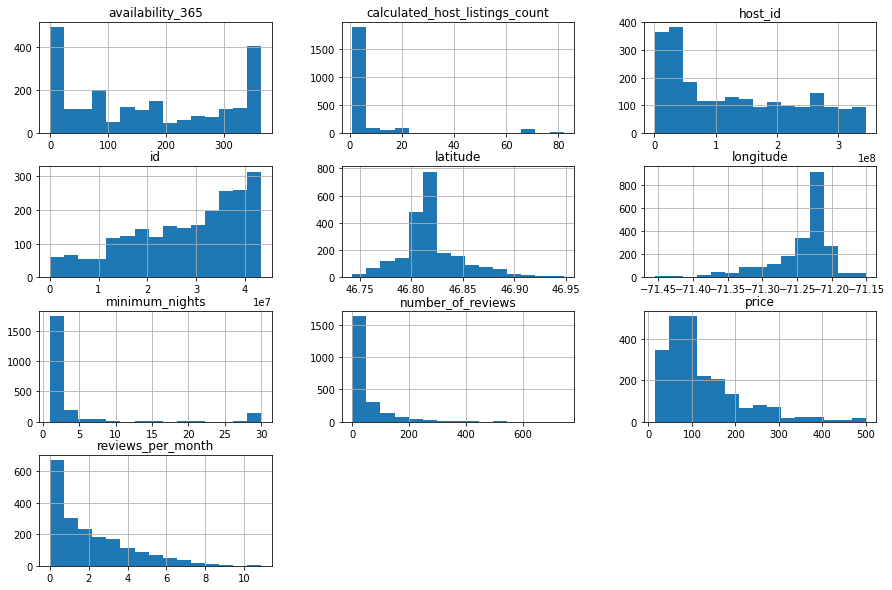

In [13]:
#deleting outliers
df_cl = df.copy()
df_cl.drop(df_cl[df_cl.price>500].index, axis=0,inplace=True)
df_cl.drop(df_cl[df_cl.minimum_nights > 30].index,axis=0,inplace=True)

#deleting column "neighbourhood_group"
df_cl.drop('neighbourhood_group',axis=1,inplace=True)

#ploting histogram again
df_cl.hist(bins = 15, figsize=(15,10));


### **Q5. What is the mean of rent prices?**

In [14]:
# show mean of price collumn
df_cl.price.mean()

120.31401617250674

### **Q6. What is the correlation among variables?**

In [15]:
# creating a matrix correlation
corr = df_cl[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
#show matrix
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.080637,-0.087334,-0.087794,0.252767,0.132812
minimum_nights,-0.080637,1.000000,-0.100566,-0.160805,-0.026366,-0.008486
number_of_reviews,-0.087334,-0.100566,1.000000,0.723631,-0.121110,0.078051
reviews_per_month,-0.087794,-0.160805,0.723631,1.000000,-0.180584,0.040102
calculated_host_listings_count,0.252767,-0.026366,-0.121110,-0.180584,1.000000,0.295260
availability_365,0.132812,-0.008486,0.078051,0.040102,0.295260,1.000000


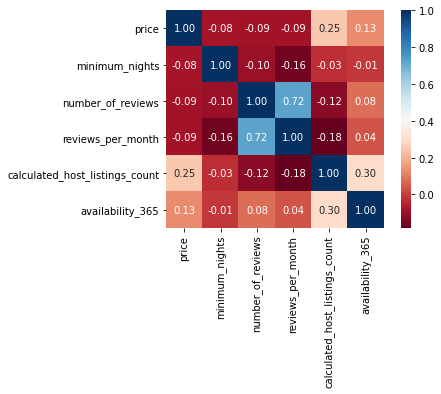

In [16]:
# plot heatmap from correlation
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. What type of property is most rented at Airbnb?**

In [17]:
# show the quantity of available properties 
df_cl.room_type.value_counts()


Entire home/apt    1558
Private room        605
Hotel room           42
Shared room          21
Name: room_type, dtype: int64

In [18]:
# percentage of available properties
df_cl.room_type.value_counts()/ df.shape[0]

Entire home/apt    0.584177
Private room       0.226847
Hotel room         0.015748
Shared room        0.007874
Name: room_type, dtype: float64

### **Q6. What location is most expensive?**



In [19]:
# Show price mean per neighbourhood
df_cl.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)


neighbourhood
Vieux-Québec/Cap-Blanc/Colline parlementaire    165.946479
Quartier 5-1                                    156.550000
Saint-Jean-Baptiste                             156.243802
Saint-Roch                                      131.911392
Cap-Rouge                                       128.157895
Quartier 5-4                                    127.510204
Saint-Émile                                     125.300000
Lac-Saint-Charles                               124.066667
Saint-Louis                                     121.136364
Jésuites                                        117.333333
Neufchâtel-Est/Lebourgneuf                      113.574074
Quartier 5-2                                    111.500000
Notre-Dame-des-Laurentides                      109.344828
Chutes-Montmorency                              108.204545
Saint-Sacrement                                 108.111111
Pointe-de-Sainte-Foy                            105.578947
Des Châtels                               

The summary above show us Quartier 5-1 is the second most expensive location. Now let's see the number of properties per neighbourhood.

In [20]:
df_cl.neighbourhood.value_counts()

Vieux-Québec/Cap-Blanc/Colline parlementaire    355
Saint-Jean-Baptiste                             242
Saint-Roch                                      237
Saint-Sauveur                                   209
Vieux-Limoilou                                  133
Cité Universitaire                              102
Maizerets                                        86
Sillery                                          75
Montcalm                                         69
Neufchâtel-Est/Lebourgneuf                       54
Quartier 5-4                                     49
Vanier                                           48
Lairet                                           46
Saint-Sacrement                                  45
Chutes-Montmorency                               44
Saint-Louis                                      44
Vieux-Moulin                                     42
Duberger-Les Saules                              34
Plateau                                          30
Notre-Dame-d

For the same neighbourhood, Quartier 5-1, we see it has only 20 properties, so the information that it is the second most expensive location is distorted.

#### Ploting properties

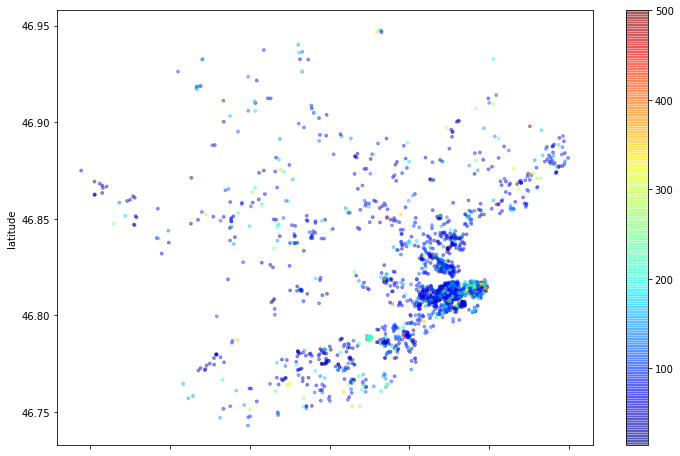

In [21]:

df_cl.plot(kind="scatter", x="longitude",y="latitude", alpha=0.4, c=df_cl['price'], s=8, cmap=plt.get_cmap('jet'),figsize=(12,8));


## Conclusions

<p style="text-align:justify">Only a superficial analysis has been done in Airbnb database and it has already been noticed that there are outliers in some variables.</p>

<p style="text-align:justify">It has also been noticed that in some locations there are few properties, which can distort statistical information for some attributes.</p>

Finally, remember that this dataset is a short version, only ideal for a initial approach. For a complete analysis the complete [dataset](http://data.insideairbnb.com/canada/qc/quebec-city/2020-05-10/data/listings.csv.gz) can be used. 



